In [1]:
import mimetypes
import datetime
import requests
import datetime
import base64
import json
import io
from PIL import Image

In [13]:
REST_API_URL = "http://127.0.0.1:5011/process" # for local dev
IMAGE_PATH = "buildings.jpg" # example image
#IMAGE_PATH = "../../image_tagger/images/2Persons.jpg"

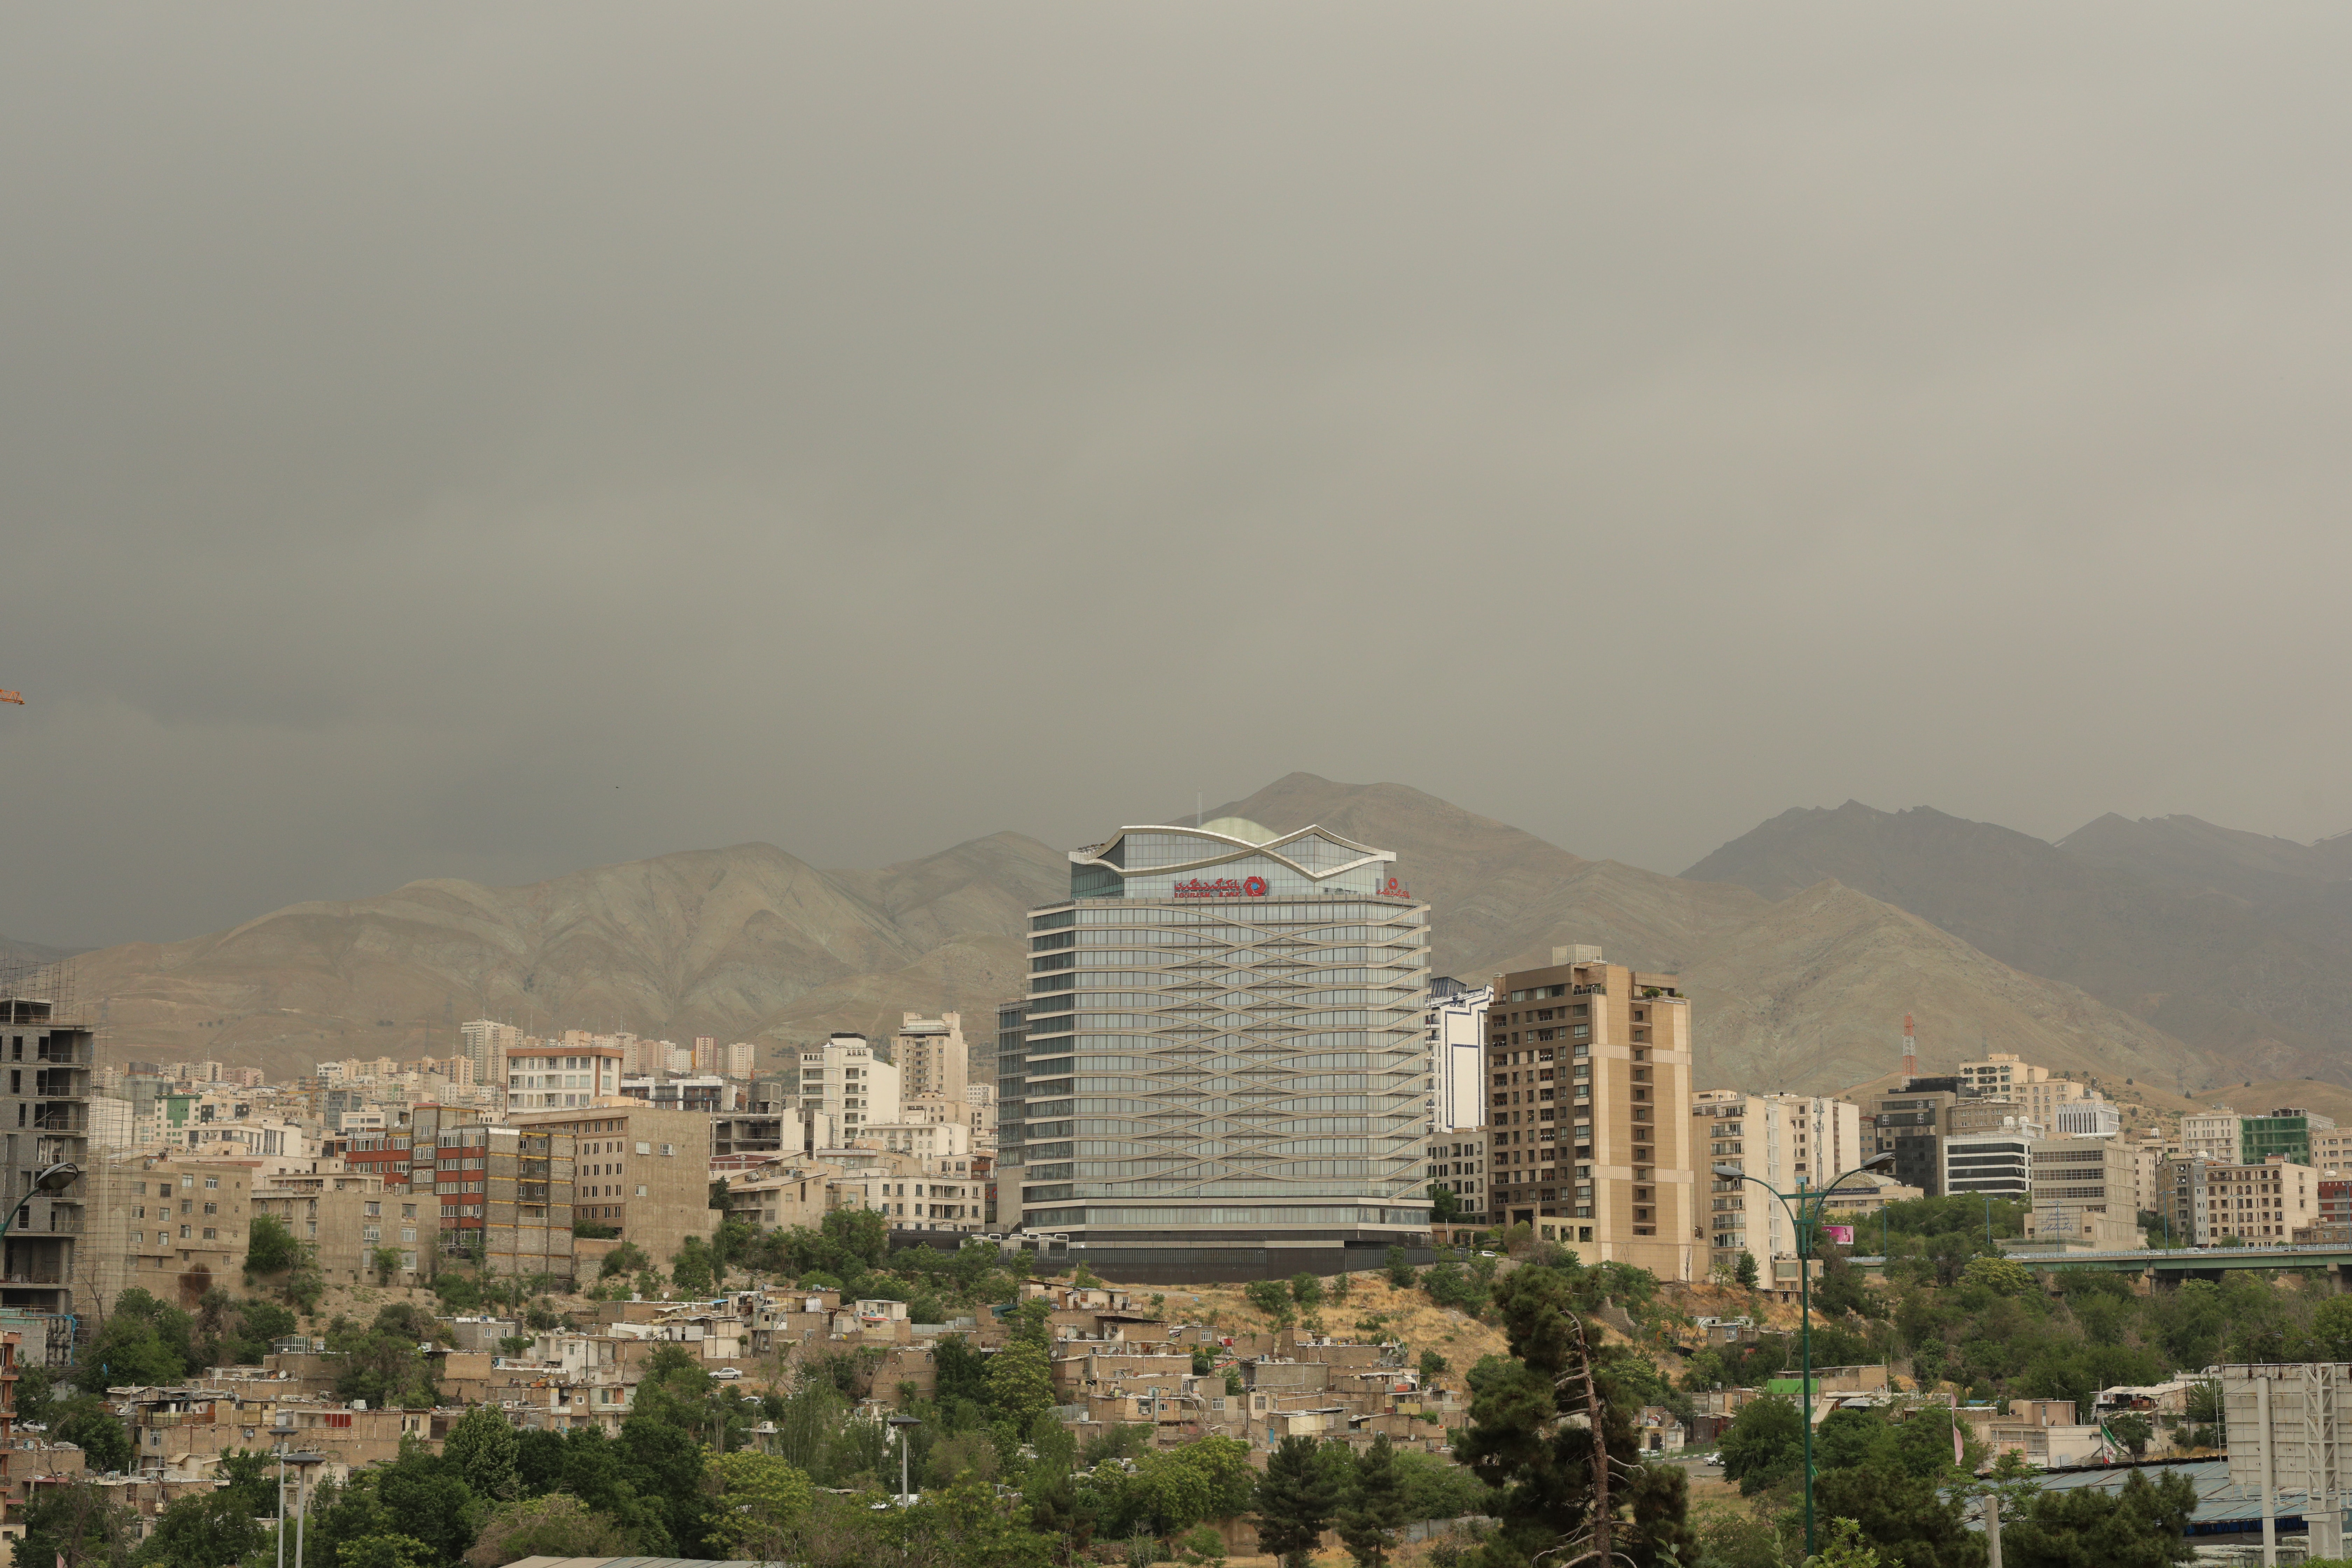

In [14]:
from IPython.display import Image
display(Image(filename=IMAGE_PATH))

In [15]:
with open(IMAGE_PATH, "rb") as f:
    im_bytes = f.read()        
im_b64 = base64.b64encode(im_bytes).decode("utf8")

In [16]:
with open("../test_docs/ocr_1_file.json", "r") as f:
    list_docs = json.load(f)

In [17]:
list_docs['documents'][0]['source']['content'] = im_b64
list_docs['documents'][0]['source']['file_name'] = "images.jpeg"
list_docs['documents'][0]['source']['file_type'] = "jpeg"
list_docs['documents'][0]['source']['fs'] ['uri']= 'file:///home/demofilesystem/test_data/Large%20Control%20DataSet/Office%20Files%20and%20Documents/images/images.jpeg'

In [18]:
with open("../test_docs/images.json", "w") as f:
    json.dump(list_docs,f,  indent=4)

In [19]:
data1 = json.dumps(list_docs).encode()

In [20]:
try:
    r = requests.post(REST_API_URL, data=data1)#files=files)
    print(r.json())
finally:

    pass

{'status': {'code': 200, 'message': 'Success'}, 'data': [{'id': '7587bcb2-4ea6-4a64-a426-040b40bf414b', 'index': 'large_control_dataset-doc', 'source': {'content': [{'skyscraper': 5}, {'street light': 4}], 'fs': {'uri': 'file:///home/demofilesystem/test_data/Large%20Control%20DataSet/Office%20Files%20and%20Documents/images/images.jpeg'}, 'file_name': 'images.jpeg', 'file_type': 'jpeg', 'embedded_depth': 0}}], 'error': '', 'number_documents_treated': 1, 'number_documents_non_treated': 0, 'list_id_not_treated': []}


In [21]:
print(r.json()['error'])

In [22]:
r.json()['data'][0]['source']['content']

[{'skyscraper': 5}, {'street light': 4}]